### IMPORTING THE LIBARAY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                        
warnings.filterwarnings("ignore")

### READING THE DATA

In [2]:
data1 = pd.read_csv("C:/Users/jahnavi/Desktop/python/WalmartSalesForecasting/train.csv")  

In [3]:
data1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
data2 = pd.read_csv("C:/Users/jahnavi/Desktop/python/WalmartSalesForecasting/stores.csv")  

In [5]:
data2.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
data3 = pd.read_csv("C:/Users/jahnavi/Desktop/python/WalmartSalesForecasting/features.csv")  

In [7]:
data3.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

(421570, 5)
(45, 3)
(8190, 12)


### MERGING THE 3 DATASET INTO ONE DATASET

In [9]:
df = data1.merge(data2, how='left').merge(data3, how='left')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [10]:
df.shape

(421570, 16)

## EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [12]:
def inspect_data(df):
    return pd.DataFrame({"Data Type":df.dtypes,"No of Levels":df.apply(lambda x: x.unique().shape[0],axis=0), "Levels":df.apply(lambda x: str(x.unique()),axis=0)})

In [13]:
inspect_data(df)

,Data Type,No of Levels,Levels
Store,int64,45,[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Dept,int64,81,[1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 19 ...
Date,object,143,['2010-02-05' '2010-02-12' '2010-02-19' '2010-...
Weekly_Sales,float64,359464,[24924.5 46039.49 41595.55 ... 1061.02 760.01 ...
IsHoliday,bool,2,[False True]
Type,object,3,['A' 'B' 'C']
Size,int64,40,[151315 202307 37392 205863 34875 202505 70713...
Temperature,float64,3528,[42.31 38.51 39.93 ... 75.87 77.55 74.09]
Fuel_Price,float64,892,[2.572 2.548 2.5140000000000002 2.561000000000...
MarkDown1,float64,2278,[nan 10382.9 6074.12 ... 1956.28 2004.02 4018.91]


* *By seeing inspect_data we can analysis the datatype of each variables,no of levels will give us count of levels in variables and levels will give all levels in variable 

In [14]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

### store

In [15]:
df['Store'].value_counts().head()

13    10474
10    10315
4     10272
1     10244
2     10238
Name: Store, dtype: int64

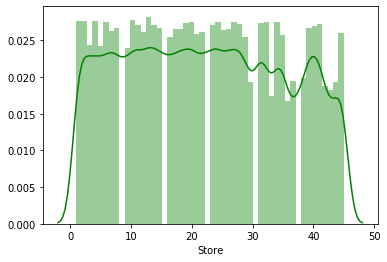

In [16]:
sns.distplot(df['Store'],color='g')

* *In the above i plot the graph aganist the store.all the data points are between the 1 to 46

### Dept

In [17]:
df['Dept'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Dept, dtype: int64

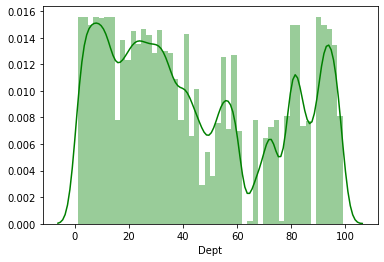

In [18]:
sns.distplot(df['Dept'],color='g')
#sns.countplot('term',data=train,hue='default_ind')

* *Plotting the graph aganist the dept.i obsevered that graph the is not normal distributed, and the values most of department fall under the 60 point

### Weekly_Sales

In [19]:
df['Weekly_Sales'][:10]

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
5    21043.39
6    22136.64
7    26229.21
8    57258.43
9    42960.91
Name: Weekly_Sales, dtype: float64

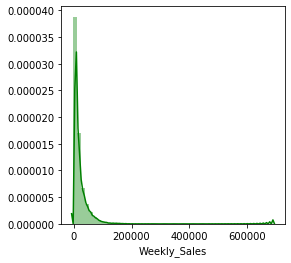

In [20]:
plt.figure(figsize=(4,4))
sns.distplot(df['Weekly_Sales'],color='g')
plt.show()

* *Ploting the graph aganist weekly_sales.i observed that data was left skewed,means more values are on left side only

In [21]:
### IsHoliday

In [22]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

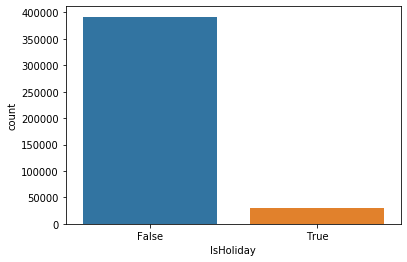

In [23]:
sns.countplot(df['IsHoliday'])

* * Iam plotting the graph on the IsHoliday,i observed that false having more than true. Than means non holiday(flase) is having more values than holiday(true).

### Temperature

In [24]:
df['Temperature'][:10]

0    42.31
1    38.51
2    39.93
3    46.63
4    46.50
5    57.79
6    54.58
7    51.45
8    62.27
9    65.86
Name: Temperature, dtype: float64

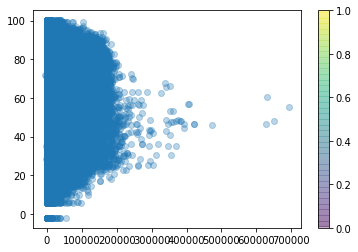

In [25]:
x = df['Weekly_Sales']
y = df['Temperature']
plt.scatter(x,y,alpha=0.3,
            cmap='viridis')
plt.colorbar();

* *I am scatter plot on the Weekly_Sales and Temperature.Most of the values are on the left side only,means it is not normal distribution 

### Fuel_Price

In [26]:
df['Fuel_Price'][:10]

0    2.572
1    2.548
2    2.514
3    2.561
4    2.625
5    2.667
6    2.720
7    2.732
8    2.719
9    2.770
Name: Fuel_Price, dtype: float64

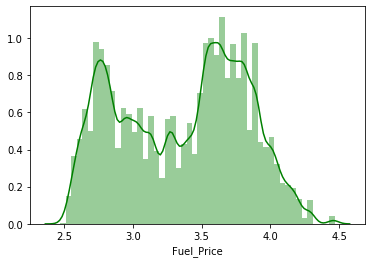

In [27]:
sns.distplot(df['Fuel_Price'],color='g')

* *Plotting the graph on Fuel_Price.i observed that graph is not normal distribution

### CPI(consumer price index)

In [28]:
df['CPI'][:20]

0     211.096358
1     211.242170
2     211.289143
3     211.319643
4     211.350143
5     211.380643
6     211.215635
7     211.018042
8     210.820450
9     210.622857
10    210.488700
11    210.439123
12    210.389546
13    210.339968
14    210.337426
15    210.617093
16    210.896761
17    211.176428
18    211.456095
19    211.453772
Name: CPI, dtype: float64

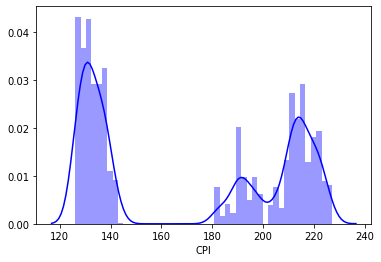

In [29]:
sns.distplot(df['CPI'],color='b')

* *I am plotting the CPI(consumer price index) in distplot data was not normally distributed

### Type

In [30]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

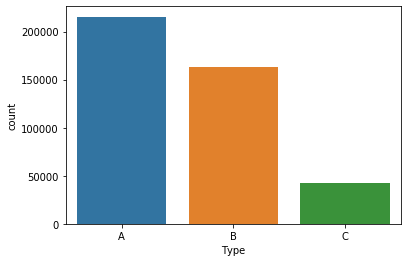

In [31]:
sns.countplot(df['Type'])

* *Plotting the Type variable in countplot,by seeing the plot we can understand that the store type a(stores) are having the more sales values then b and c

### Unemployment

In [32]:
df['Unemployment'][:20]

0     8.106
1     8.106
2     8.106
3     8.106
4     8.106
5     8.106
6     8.106
7     8.106
8     7.808
9     7.808
10    7.808
11    7.808
12    7.808
13    7.808
14    7.808
15    7.808
16    7.808
17    7.808
18    7.808
19    7.808
Name: Unemployment, dtype: float64

(array([ 14791.,  27602.,  77223., 114533., 122397.,  26544.,  14563.,
          5009.,   2491.,  16417.]),
 array([ 3.879 ,  4.9224,  5.9658,  7.0092,  8.0526,  9.096 , 10.1394,
        11.1828, 12.2262, 13.2696, 14.313 ]),
 <a list of 10 Patch objects>)

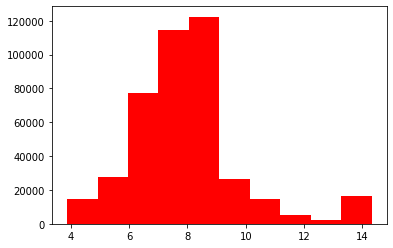

In [33]:
plt.hist(df['Unemployment'],color='r')

* *By seeing the above graph we can see that more values are on left side.BY using the histogram we can see that where the data is normally distributed or not. 

### Size

In [34]:
df['Size'].value_counts().head()

39690     20802
39910     20597
203819    20376
219622    10474
126512    10315
Name: Size, dtype: int64

(array([ 73341.,  19205.,      0.,  28847.,  78022.,  19386.,  50234.,
             0.,  30006., 122529.]),
 array([ 34875. ,  53349.7,  71824.4,  90299.1, 108773.8, 127248.5,
        145723.2, 164197.9, 182672.6, 201147.3, 219622. ]),
 <a list of 10 Patch objects>)

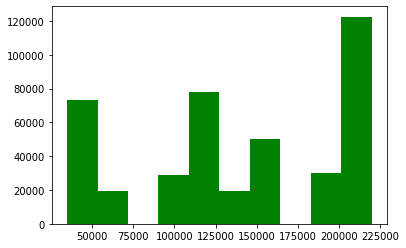

In [35]:
plt.hist(df['Size'],color='g')

In [36]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

## categorical columns

In [37]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [38]:
type_df = pd.get_dummies(df['Type'])
type_df.head(5)

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
df = pd.concat([df,type_df],axis=1)

In [40]:
df = df.drop(columns='Type')

In [41]:
df.shape

(421570, 18)

#### Date variable is a timeseries value,so for doing regression problem we should extra the month,year values separatly

In [42]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C,year,month
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,0,0,2010,2
1,1,1,2010-02-12,46039.49,True,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,0,0,2010,2
2,1,1,2010-02-19,41595.55,False,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,1,0,0,2010,2
3,1,1,2010-02-26,19403.54,False,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,1,0,0,2010,2
4,1,1,2010-03-05,21827.90,False,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,1,0,0,2010,3


In [43]:
df.drop('Date',axis=1,inplace=True)

* *As it is a timeseries date,better to remove the variable

### FILLING NULL VALUES

In [44]:
df.fillna(value=0,inplace=True)

In [45]:
df.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
A               0
B               0
C               0
year            0
month           0
dtype: int64

[]

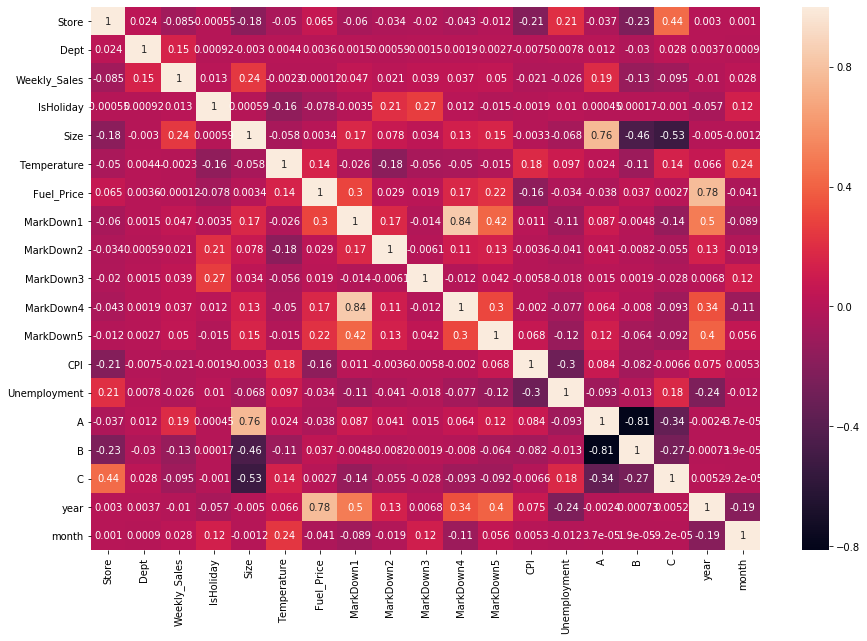

In [46]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

* *By seeing the above heatmap we can analysis that there is no high correaltion between the values.but we have the negative correlation,but is less negative correlation.So it is not required to remove the variables

In [47]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'A', 'B', 'C', 'year', 'month'],
      dtype='object')

In [48]:
df.drop(['Fuel_Price','CPI', 'Unemployment'],axis=1,inplace=True)

* *As Fuel_Price,CPI,Unemployment are not useful for our model to predict the weekly_sales,so better to remove the variables 

In [49]:
df.shape

(421570, 16)

### DEPENDENT AND INDEPENDENT VARIABLES

In [50]:
y = df['Weekly_Sales']
X = df[df.columns.difference(['Weekly_Sales'])]
print(y.shape)
print(X.shape)

(421570,)
(421570, 15)


#### SPLITING THE DATA INTO TRAIN AND TEST

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=421)

print(X_train.shape)
print(X_valid.shape)

(295099, 15)
(126471, 15)


### STANDARD SCALER
Applying the StandardScaler to variables to get the all the variables in the same scale

In [52]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.transform(X_valid)

In [53]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

print(linear.score(X_train, y_train))
print(linear.score(X_valid, y_valid))

0.08971821228470911
0.0871683850453916


In [54]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_valid, y_valid))

0.9999996139076346
0.9164047930953436


In [55]:
from sklearn.ensemble import RandomForestRegressor
rfc1 = RandomForestRegressor(n_estimators = 200,max_depth=112,n_jobs=-1)
rfc1.fit(X_train,y_train)
print(rfc1.score(X_train, y_train))
print(rfc1.score(X_valid, y_valid))

0.9950137977113652
0.9522815419834296


In [56]:
y_pred = rfc1.predict(X_valid)

CONCLUSION
* *After applying the machine learning algorithm such as logistic,decision tree and random forest. I am getting good results by using random forest with 99% for train and 95% for test. 

### READING TEST DATA

In [57]:
test = pd.read_csv("C:/Users/jahnavi/Desktop/python/WalmartSalesForecasting/test.csv")  
test.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [58]:
stores = pd.read_csv("C:/Users/jahnavi/Desktop/python/WalmartSalesForecasting/stores.csv")  
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [59]:
features = pd.read_csv("C:/Users/jahnavi/Desktop/python/WalmartSalesForecasting/features.csv")  
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


#### Combining the 3 dataset into 1 dataset

In [60]:
test = test.merge(stores, how='left').merge(features, how='left')
test.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [61]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [62]:
test.drop([ 'Fuel_Price','CPI', 'Unemployment'],axis=1,inplace=True)

In [63]:
test.shape

(115064, 12)

In [64]:
df.shape

(421570, 16)

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 12 columns):
Store          115064 non-null int64
Dept           115064 non-null int64
Date           115064 non-null object
IsHoliday      115064 non-null bool
Type           115064 non-null object
Size           115064 non-null int64
Temperature    115064 non-null float64
MarkDown1      114915 non-null float64
MarkDown2      86437 non-null float64
MarkDown3      105235 non-null float64
MarkDown4      102176 non-null float64
MarkDown5      115064 non-null float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 10.6+ MB


#### Date variable is a timeseries value,so for doing regression problem we should extra the month,year values separatly

In [66]:
test['year'] = pd.DatetimeIndex(test['Date']).year
test['month'] = pd.DatetimeIndex(test['Date']).month
#test['day'] = pd.DatetimeIndex(test['Date']).day
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,year,month
0,1,1,2012-11-02,False,A,151315,55.32,6766.44,5147.70,50.82,3639.90,2737.42,2012,11
1,1,1,2012-11-09,False,A,151315,61.24,11421.32,3370.89,40.28,4646.79,6154.16,2012,11
2,1,1,2012-11-16,False,A,151315,52.92,9696.28,292.10,103.78,1133.15,6612.69,2012,11
3,1,1,2012-11-23,True,A,151315,56.23,883.59,4.17,74910.32,209.91,303.32,2012,11
4,1,1,2012-11-30,False,A,151315,52.34,2460.03,NaN,3838.35,150.57,6966.34,2012,11


In [67]:
test.drop('Date',axis=1,inplace=True)

* *As Date is a timeseries data better to drop the variable

In [68]:
test.fillna(value=0,inplace=True)

In [69]:
test.isnull().sum()

Store          0
Dept           0
IsHoliday      0
Type           0
Size           0
Temperature    0
MarkDown1      0
MarkDown2      0
MarkDown3      0
MarkDown4      0
MarkDown5      0
year           0
month          0
dtype: int64

#### dummifing the type variable

In [70]:
type_test = pd.get_dummies(test['Type'])
type_test.head(5)

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [71]:
test = pd.concat([test,type_test],axis=1)

In [72]:
test = test.drop(columns='Type')

In [73]:
test.shape

(115064, 15)

In [74]:
df.shape

(421570, 16)

In [75]:
test.head(5)

,Store,Dept,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,year,month,A,B,C
0,1,1,False,151315,55.32,6766.44,5147.70,50.82,3639.90,2737.42,2012,11,1,0,0
1,1,1,False,151315,61.24,11421.32,3370.89,40.28,4646.79,6154.16,2012,11,1,0,0
2,1,1,False,151315,52.92,9696.28,292.10,103.78,1133.15,6612.69,2012,11,1,0,0
3,1,1,True,151315,56.23,883.59,4.17,74910.32,209.91,303.32,2012,11,1,0,0
4,1,1,False,151315,52.34,2460.03,0.00,3838.35,150.57,6966.34,2012,11,1,0,0


#### predicted the values by using the test data

In [76]:
y_pred_test = rfc1.predict(test)

In [77]:
test1 = pd.read_csv("C:/Users/jahnavi/Desktop/python/WalmartSalesForecasting/test.csv")  
test1.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [78]:
#Id = data5['Store'].astype(str)+'_'+data5['Dept'].astype(str)+'_'+data5['Date'].astype(str) 

In [79]:
#Id[:2]

In [80]:
#data9 = {'Id':Id,'Weekly_Sales':y_pred_test}

### SUBMISSION FILE

In [81]:
submission_file = pd.DataFrame({
        "Store_Dept_Date": test1.Store.astype(str)+'_'+test1.Dept.astype(str)+'_'+test1.Date.astype(str),
        "Weekly_Sales": y_pred_test
    })

In [82]:
submission_file.head(5)

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,8466.23550
1,1_1_2012-11-09,8466.23550
2,1_1_2012-11-16,8466.23550
3,1_1_2012-11-23,8466.23550
4,1_1_2012-11-30,8455.49585


In [83]:
submission_file.to_csv('submission_walmart_file.csv',index=False)